In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
import re

In [3]:
from io import StringIO
from os import listdir
from os.path import isfile

exclude = ["Мужчина в самом расцвете сил.txt", "заметки.txt"]
thefiles = [f for f in listdir('.') if isfile(f) and f.endswith(".txt") and f not in exclude]

In [4]:
def name():
    plt.xlabel("Угол, °")
    plt.ylabel("Напряжение, мВ")
    plt.xticks(np.arange(0, 361, 30), minor=True)
    plt.xticks(np.arange(0, 361, 90))

I'm going home to sauber.txt
Kickoo_1.txt
Kickoo_2.txt
Это настоящая проверка на прочность .txt


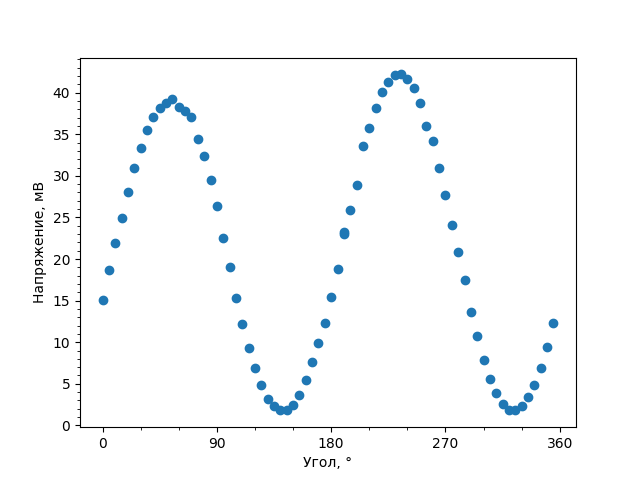

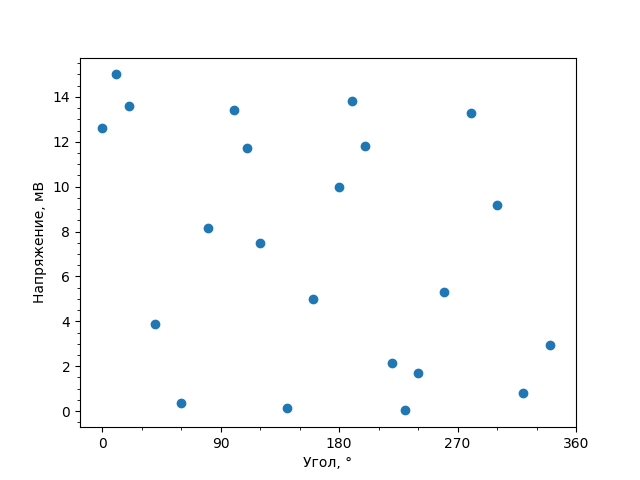

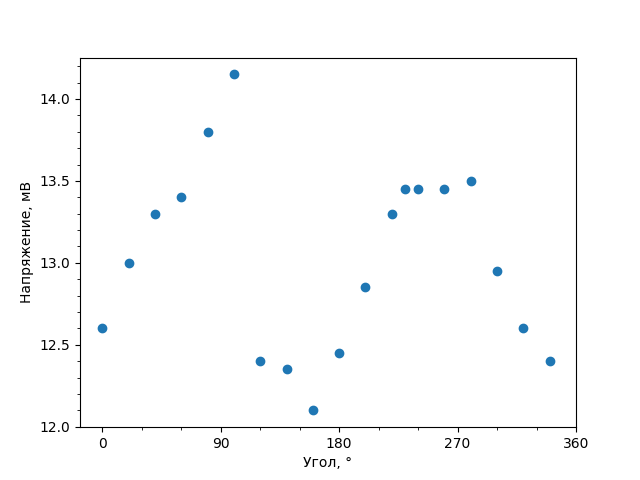

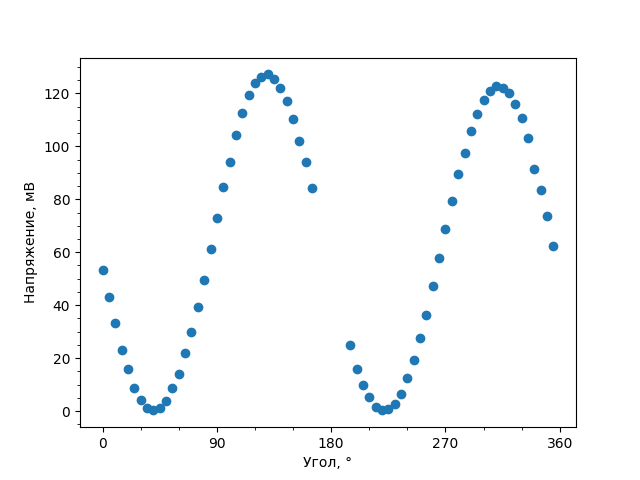

In [7]:
all_the_data = {}
%matplotlib widget
for f in thefiles:
    print(f)
    text = open(f, encoding="utf-8").read()
    df = pd.read_csv(StringIO(text), delimiter=" ", comment="#", header=None)
    all_the_data[f] = df
    fig, ax = plt.subplots(1, 1)
    #ax.set_title(f[:-4])
    ax.minorticks_on()
    ax.scatter(df[0], df[1])
    ax.set_xlabel("λ, нм")
    name()
    #fig.savefig(f[:-4] + '.jpg', dpi=100)
    # fig.show()

In [5]:
from scipy.optimize import curve_fit

C:\Users\andr\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\Users\andr\AppData\Local\Temp\ipykernel_14436\1263604818.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


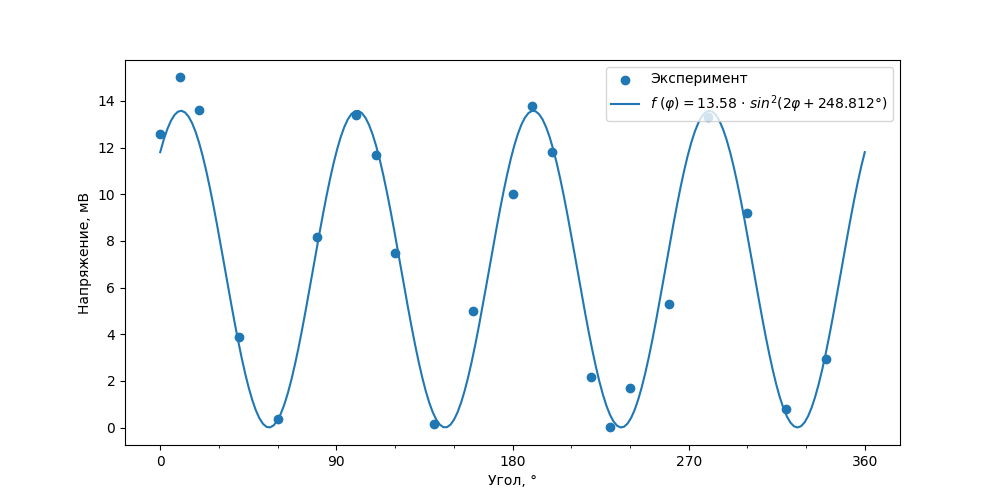

In [17]:
x = all_the_data["Kickoo_1.txt"][0]
y = all_the_data["Kickoo_1.txt"][1]
f = lambda x, A, φ: A*np.sin(x/180*np.pi*2 + φ)**2
res, err = curve_fit(f, x, y)
A, φ = res 

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Эксперимент")
X = np.linspace(0, 360, 200)
name()
plt.plot(X, f(X, *res), label=f"$f\ (φ)={round(A, 2)}\ ⋅\ sin^2(2φ + {round(φ*180/np.pi, 3)}°)$")

plt.legend(loc=1)
plt.savefig("approx_kickoo_1.png")

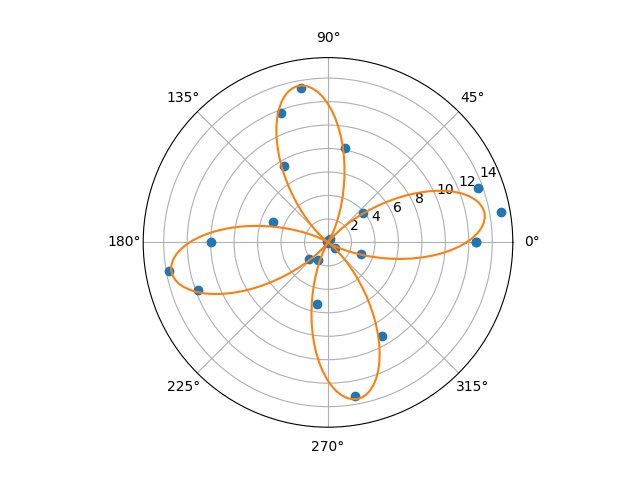

In [8]:
plt.figure()
x = list(x) + [x[0]]
y = list(y) + [y[0]]
plt.polar(np.array(x)/180*np.pi, y, "o")
plt.polar(X/180*np.pi, f(X, *res))
plt.savefig("round_approx_kickoo_1.png")
plt.show()

Max 70 42.2
Min 330 1.8


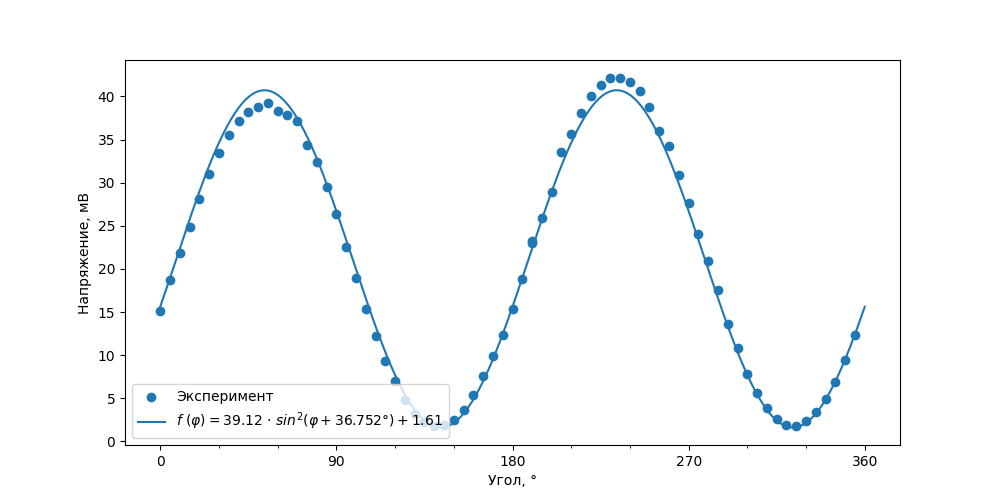

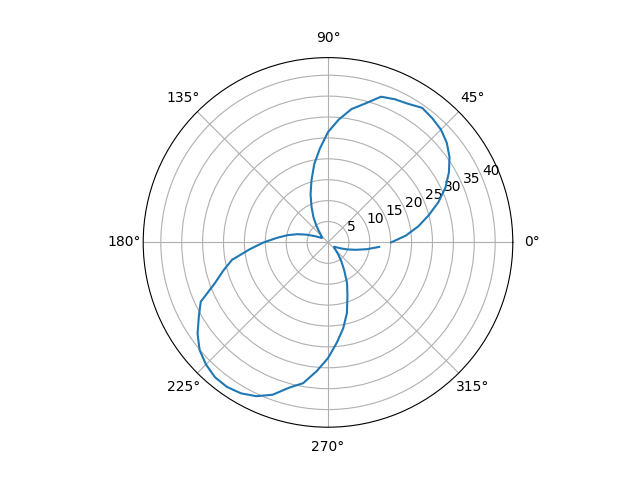

Max 325 127.2
Min 235 0.23


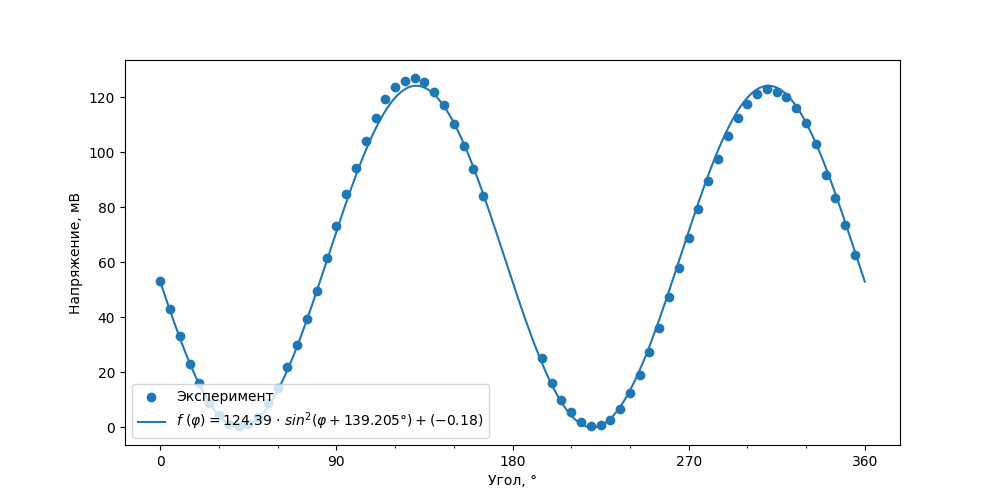

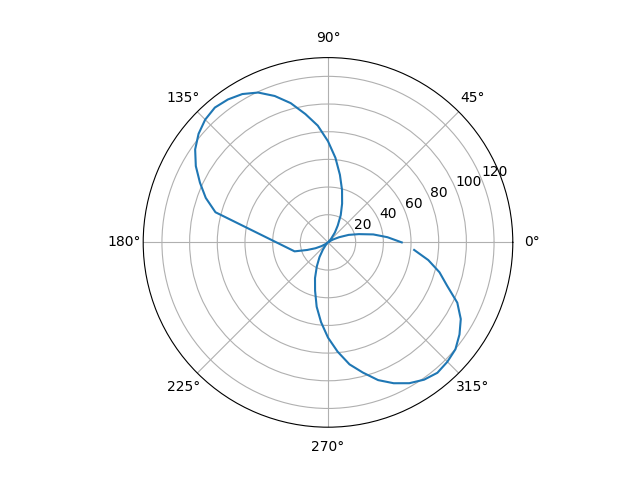

In [18]:
%matplotlib widget
for f_name in ("I'm going home to sauber.txt", "Это настоящая проверка на прочность .txt"):
    s = np.argsort(all_the_data[f_name][0])
    x = all_the_data[f_name][0][s]
    y = all_the_data[f_name][1][s]
    
    print("Max", x[np.argmax(y, axis=0)], np.max(y, axis=0))
    print("Min", x[np.argmin(y, axis=0)], np.min(y, axis=0))

    f = lambda x, A, φ, c: A*np.sin(x/180*np.pi + φ)**2 + c
    res, err = curve_fit(f, x, y, p0=[120, 0.1, 1])
    A, φ, c = res

    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label="Эксперимент")
    name()
    X = np.linspace(0, 360, 200)
    c = round(c, 2)
    if c < 0:
        c = f"({c})"
    plt.plot(X, f(X, *res), label=f"$f\ (φ)={round(A, 2)}\ ⋅\ sin^2(φ + {round(φ*180/np.pi, 3)}°) + {c}$")

    plt.legend(loc=3)
    
    plt.savefig(f"{f_name}_lin_approx.png")
    
    plt.show()
    plt.figure()
    plt.polar(x/180*np.pi, y)
    
    plt.savefig(f"{f_name}_polar.png")
    
    plt.show()

Max 70 42.2
Min 330 1.8


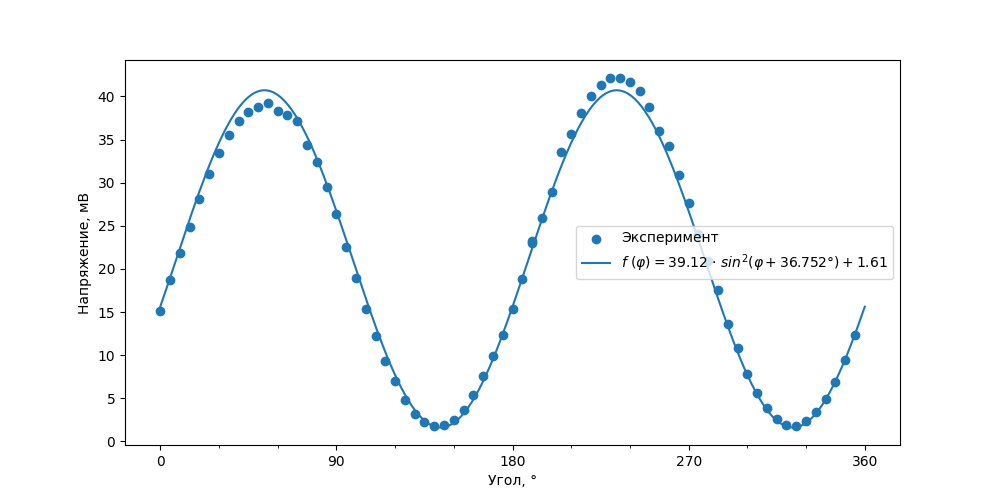

In [36]:
%matplotlib widget
f_name = "I'm going home to sauber.txt"
s = np.argsort(all_the_data[f_name][0])
x = all_the_data[f_name][0][s]
y = all_the_data[f_name][1][s]

print("Max", x[np.argmax(y, axis=0)], np.max(y, axis=0))
print("Min", x[np.argmin(y, axis=0)], np.min(y, axis=0))

f = lambda x, A, φ, c: A*np.sin(x/180*np.pi + φ)**2 + c
res, err = curve_fit(f, x, y, p0=[120, 0.1, 1])
A, φ, c = res

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Эксперимент")
name()
X = np.linspace(0, 360, 200)
c = round(c, 2)
if c < 0:
    c = f"({c})"
plt.plot(X, f(X, *res), label=f"$f\ (φ)={round(A, 2)}\ ⋅\ sin^2(φ + {round(φ*180/np.pi, 3)}°) + {c}$")
plt.legend()
plt.show()

C:\Users\andr\AppData\Local\Temp\ipykernel_8920\2253647243.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return (I_0 - I_s) * np.cos(x/180*np.pi - a)**2 + (I_s*I_0)**0.5*np.sin(2*(x/180*np.pi - a)) + I_s


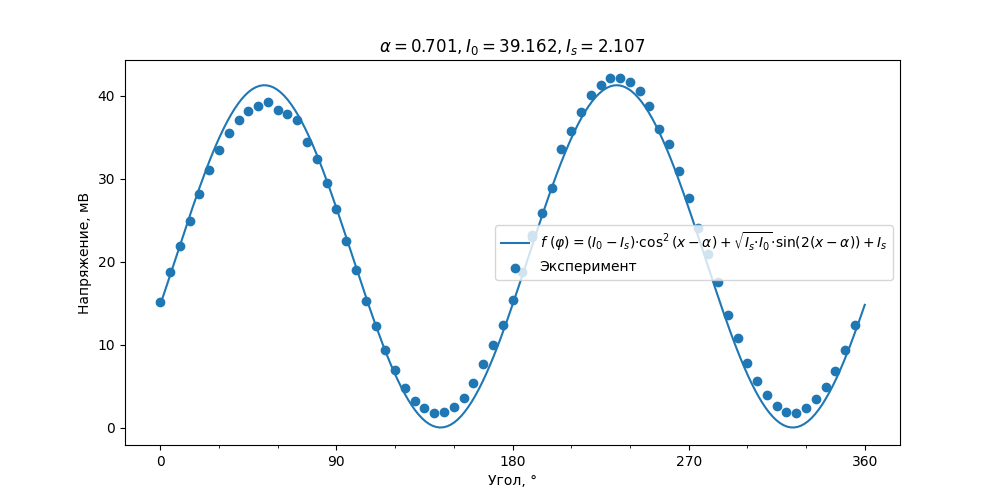

array([ 0.70109656, 39.16223561,  2.1071642 ])

In [84]:
%matplotlib widget
def f2(x, a, I_0, I_s):
    #print((I_s*I_0)**0.5)
    return (I_0 - I_s) * np.cos(x/180*np.pi - a)**2 + (I_s*I_0)**0.5*np.sin(2*(x/180*np.pi - a)) + I_s

X = np.linspace(0, 360, 200)
plt.figure(figsize=(10, 5))
#plt.plot(X, f2(X, -80/180*np.pi, 20, 20))
res2, err = curve_fit(f2, x, y, p0=[80/180*np.pi, 20, 10])
a, I_0, I_s = np.round(res2, 3)
plt.plot(X, f2(X, *res2),
         label=f"$f\ (φ)=(I_0 - I_s) ⋅ \cos^2(x - α) + \sqrt{{I_s⋅I_0}}⋅\sin(2(x - α)) + I_s$")
plt.title(f"$α={a}, I_0 = {I_0}, I_s={I_s}$")
#plt.plot(X, f(X, *res), label=f"$f\ (φ)={round(A, 2)}\ ⋅\ sin^2(φ + {round(φ*180/np.pi, 3)}°) + {c}$")
plt.scatter(x, y, label="Эксперимент")
name()
plt.legend()
plt.savefig(f_name[:-4] + "_second_approx.png")
plt.show()
res2

In [68]:
res2

array([-1.07149558,  7.16326768, 34.10613161])